In [1]:
from layers import *
from synaptics import *
from visual_env import *
from stats import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# PARAMETERS OF NETWORK:
retina_size = (1, 10)
resolution = .1
input_layer_size = retina_size[0] * retina_size[1]
output_layer_size = 1
tau = 30
triplet_tau = 0
preset = 'RS'
g_strength = 200

In [3]:
layer0 = IzhikevichLayer(size=input_layer_size, resolution=resolution, tau=tau, preset=preset, noize=1)
layer0.transmitter_impact = g_strength
layer1 = IzhikevichLayer(size=output_layer_size, resolution=resolution, tau=tau, preset=preset, noize=1)
synapse = Synapse(layer0, layer1)
rates0 = rate_capture(layer0)
rates1 = rate_capture(layer1)
synapse.load_weights(name='checkpoints\save10_1by3.npy')

In [4]:
weights = np.zeros(input_layer_size*output_layer_size).reshape(1, input_layer_size, output_layer_size)
pre_v = np.zeros(input_layer_size).reshape(1, input_layer_size)
pre_syn = np.zeros(input_layer_size).reshape(1, input_layer_size)
post_v = np.zeros(output_layer_size).reshape(1, output_layer_size)
post_syn = np.zeros(output_layer_size).reshape(1, output_layer_size)
rates0.reset()
rates1.reset()

In [5]:
vis = retina(size=retina_size)
pattern = np.ones(3).reshape(1,3) * 25
vis.add_object(pattern)
vis.set_position_lazy(x='right', y='centered')
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25. 25. 25.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
g_strength = 85
layer0.transmitter_impact = g_strength

t = 100
time = int(t / resolution)
lr = .01
alpha = 5
pattern_delay = int(4/ resolution)
direction = 'left'
gather_data = True
learn = False

for i in range(time):
    synapse.forward()
    picture = vis.tick(delay=pattern_delay, move_direction=direction, noize_density=.1, noize_acceleration=7, rest=int(220/resolution))
    layer0.apply_current(picture.flatten())
    layer1.forward()
    rates0.accumulate_spikes()
    rates1.accumulate_spikes()
    if learn:
        synapse.STDP(learning_rate=lr, assymetry=alpha)
    #synapse.STDP(learning_rate=lr, assymetry=alpha)
    if gather_data:
        #weights = np.append(weights, np.array([synapse.weights]), axis=0)
        pre_v = np.append(pre_v, np.array([layer0.v]), axis=0)
        pre_syn = np.append(pre_syn, np.array([layer0.impulses]), axis=0)
        post_v = np.append(post_v, np.array([layer1.v]), axis=0)
        post_syn = np.append(post_syn, np.array([layer1.impulses]), axis=0)
layer0.instant_rest()
layer1.instant_rest()

c:\Users\iamkg0\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


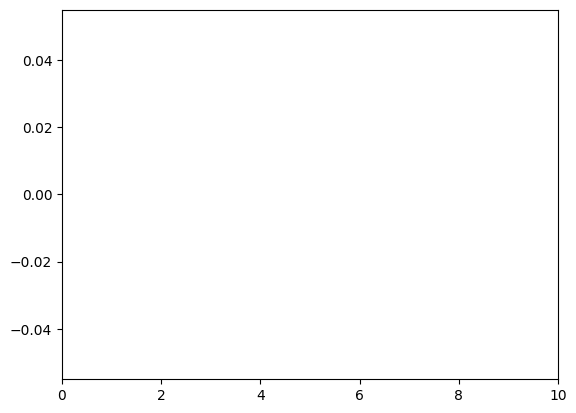

In [9]:
x_scale = np.arange(int(pre_v.shape[0])) * resolution
def anim_pre_v():
    for i in range(pre_v.shape[1]):
        temp = np.array(pre_v[:, i]).flatten()
        return temp[1:]




fig, ax = plt.subplots()
ax.set_xlim([0, 10])

pl = ax.plot(1, 0)
x = np.linspace(0, 10)


ani = animation.FuncAnimation(fig, anim_pre_v(), repeat=True,
                                    frames=len(x) - 1, interval=50)

# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=15,
#                                 metadata=dict(artist='Me'),
#                                 bitrate=1800)
# ani.save('scatter.gif', writer=writer)

plt.show()

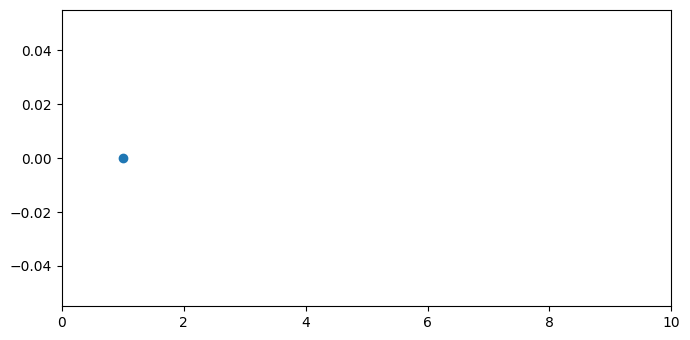

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim([0, 10])

scat = ax.scatter(1, 0)
x = np.linspace(0, 10)


def animate(i):
    scat.set_offsets((x[i], 0))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=len(x) - 1, interval=50)

# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=15,
#                                 metadata=dict(artist='Me'),
#                                 bitrate=1800)
# ani.save('scatter.gif', writer=writer)

plt.show()